#Tweets, Trump, and Twitter

##The Controversial Leader and His Association with Social Media

From riches to the White House, Donald Trump has remained on the lips of many since his flashy lifestyle during the Reaganomics era until his divisive days as president. Using social media's platform Twitter, the "in your face" billionaire leader has stirred the media circus pot by consistently adding his two cents. 

Starting in May of 2009 and ending in December 2016, this Data World data set provides the end user with tweets that includes Trump's popular name. The goal is to utilize natural language processing techniques learned in DATA 620. By implementing sentiment analysis and other Python based procedures, we will determine if the tweets are positive or negative.

#Libraries

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import re
%matplotlib inline

#Import the Dataset

In [131]:
# import the trump csv file from the git hub address listed
trumpTweets = pd.read_csv('https://raw.githubusercontent.com/LilesB/Data-620/master/trump.csv', encoding = "ISO-8859-1")

After several attempts of importing the data failed; adding the ISO-8859-1 encode imported the data without a hitch.

In [132]:
# using the shape function to check the dimensions of trumpTweets
trumpTweets.shape

(30078, 5)

Based off the shape function, we see that the trumpTweets data frame has 5 columns and 30,078 observations.

In [133]:
# view the head of the document
trumpTweets.head()

,Date,Time,Tweet,Client,Client Simplified
0,12/05/2016,12:00:27 PM,If the press would cover me accurately & honor...,Twitter Web Client,Twitter Web Client
1,12/05/2016,9:53:11 AM,I am thrilled to nominate Dr. @RealBenCarson a...,Twitter for iPhone,Twitter for iPhone
2,12/04/2016,6:30:22 PM,their country (the U.S. doesn't tax them) or t...,Twitter for Android,Twitter for Android
3,12/04/2016,6:23:55 PM,Did China ask us if it was OK to devalue their...,Twitter for Android,Twitter for Android
4,12/04/2016,5:47:21 PM,".@FoxNews will be re-running ""Objectified: Don...",Twitter for Android,Twitter for Android


In [134]:
# view the tail of the document
trumpTweets.tail()

,Date,Time,Tweet,Client,Client Simplified
30073,05/12/2009,10:07:28 AM,"""My persona will never be that of a wallflower...",Twitter Web Client,Twitter Web Client
30074,05/08/2009,4:40:15 PM,New Blog Post: Celebrity Apprentice Finale and...,Twitter Web Client,Twitter Web Client
30075,05/08/2009,9:38:08 AM,Donald Trump reads Top Ten Financial Tips on L...,Twitter Web Client,Twitter Web Client
30076,05/04/2009,9:00:10 PM,Donald Trump will be appearing on The View tom...,Twitter Web Client,Twitter Web Client
30077,05/04/2009,2:54:25 PM,Be sure to tune in and watch Donald Trump on L...,Twitter Web Client,Twitter Web Client


#Data Exploration

After viewing the end points of the data, our first step is to try to identify any trends. Since the first tweet in the dataframe begins on 5/4/09 and ends @ 12/5/2016 it is clear to see that we have 7 years of tweets including Donald Trump. Time is another aspect that could be explored. Are more negative tweets released in the AM versus the PM? Skipping over the Tweet column, we find our first question; does Client and Client Simplified have the same data? In order to investigate further, we utilize the value_counts() function from pandas.

In [135]:
trumpTweets['Client'].value_counts()

Twitter for Android         14197
Twitter Web Client          12122
Twitter for iPhone           2336
TweetDeck                     483
TwitLonger Beta               405
Instagram                     133
Facebook                      105
Twitter for BlackBerry         97
Twitter Ads                    64
Mobile Web (M5)                56
Twitlonger                     23
Twitter for iPad               22
Twitter QandA                  10
Vine - Make a Scene            10
Periscope                       7
Neatly For BlackBerry 10        5
Media Studio                    1
Twitter Mirror for iPad         1
Twitter for Websites            1
Name: Client, dtype: int64

In [136]:
trumpTweets['Client Simplified'].value_counts()

Twitter for Android    14197
Twitter Web Client     12122
Twitter for iPhone      2336
Other                   1423
Name: Client Simplified, dtype: int64

Based off the use of the value_counts function we can see that the Client column provides an in-depth look at the users making the tweets, while the Client Simplified column stores more general data. In addition to those findings, one can see that Android users made the most Trump related tweets with the Web Client coming in second with a slim margin of 2,075. iPhone users came in third with nearly 12,000 tweets behind the top spot.

Next, we will plot the top 7 sources of tweets from the Client column, and also the all-encompassing Client Simplified column.

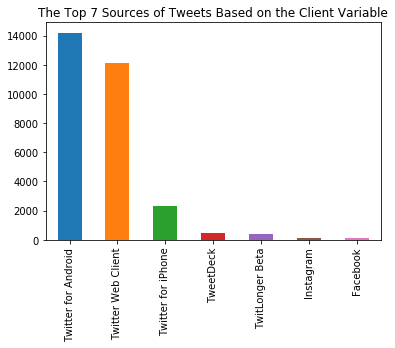

In [137]:
trumpTweets['Client'].value_counts()[:7].plot(kind='bar', title = "The Top 7 Sources of Tweets Based on the Client Variable")

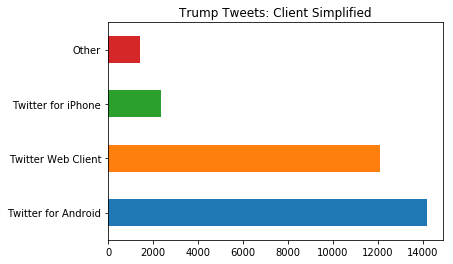

In [138]:
trumpTweets['Client Simplified'].value_counts().plot(kind='barh', title = "Trump Tweets: Client Simplified")

Next, we will extract the Year and Month in order to gain a visual on the amount of tweets that occurred over time.

In [139]:
trumpTweets['Date'] = pd.to_datetime(trumpTweets['Date'])
trumpTweets['Year'], trumpTweets['Month'] = trumpTweets['Date'].dt.year, trumpTweets['Date'].dt.month
trumpTweets.head()

,Date,Time,Tweet,Client,Client Simplified,Year,Month
0,2016-12-05,12:00:27 PM,If the press would cover me accurately & honor...,Twitter Web Client,Twitter Web Client,2016,12
1,2016-12-05,9:53:11 AM,I am thrilled to nominate Dr. @RealBenCarson a...,Twitter for iPhone,Twitter for iPhone,2016,12
2,2016-12-04,6:30:22 PM,their country (the U.S. doesn't tax them) or t...,Twitter for Android,Twitter for Android,2016,12
3,2016-12-04,6:23:55 PM,Did China ask us if it was OK to devalue their...,Twitter for Android,Twitter for Android,2016,12
4,2016-12-04,5:47:21 PM,".@FoxNews will be re-running ""Objectified: Don...",Twitter for Android,Twitter for Android,2016,12


In [140]:
trumpTweets['Year'].value_counts()

2013    8144
2015    7530
2014    5792
2016    4109
2012    3531
2011     774
2010     142
2009      56
Name: Year, dtype: int64

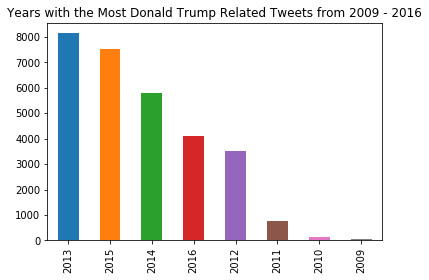

In [141]:
trumpTweets['Year'].value_counts().plot(kind='bar', title = "Years with the Most Donald Trump Related Tweets from 2009 - 2016")

In [142]:
trumpTweets['Month'].value_counts()

10    3244
1     2856
7     2783
4     2657
5     2477
2     2391
9     2352
11    2329
3     2322
6     2270
12    2217
8     2180
Name: Month, dtype: int64

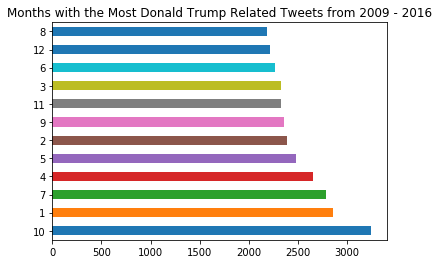

In [143]:
trumpTweets['Month'].value_counts().plot(kind='barh', title = "Months with the Most Donald Trump Related Tweets from 2009 - 2016")

Based off the prior graphs, one can see that 2013 produced the most Donald Trump related tweets with a little over 8,144 while October was the busiest month with 3,244 tweets.

#Sentiment Analysis

In order to conduct sentiment analysis on the dataframe, we will utilize the features of the TextBlob module. With TextBlob,
one can discover the polarity and subjectivity of text. According to the documentation of the module, it states that the polarity score is a float within the range from (-1.0,1.0). And subjectivity is a float within the range (0.0, 1.0) where 0.0 is very objective and 1.0 is very subjective. 

First, we will take a look at a small example of data based on those who tweeted via the social media giant Facebook.

In [13]:
# load the module into Python
from textblob import TextBlob

In [144]:
criteria = trumpTweets['Client'] == 'Facebook'
trumpFB = trumpTweets[criteria]

def sa_polarity(Tweet):
    return TextBlob(Tweet).sentiment.polarity

trumpFB['polarity'] = trumpFB.Tweet.apply(sa_polarity)
trumpFB

C:\Users\lizza\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Date,Time,Tweet,Client,Client Simplified,Year,Month,polarity
6497,2015-08-28,1:33:41 PM,#MakeAmericaGreatAgain From my speech in South...,Facebook,Other,2015,8,0.000000
6731,2015-08-06,4:56:53 PM,Just arrived for the #GOPdebate #MakeAmericaGr...,Facebook,Other,2015,8,0.000000
19059,2013-09-11,2:29:00 PM,"Donald Trump Jr., Ivanka Trump, Eric Trump, an...",Facebook,Other,2013,9,0.100000
19346,2013-09-03,5:07:35 PM,"From the great author of Rich Dad, Poor Dad-- ...",Facebook,Other,2013,9,0.388750
19355,2013-09-03,2:04:11 PM,Enjoy the ratings of President Obama. http://t...,Facebook,Other,2013,9,0.400000
19686,2013-08-20,12:19:13 PM,"Our great project in South America, Trump Towe...",Facebook,Other,2013,8,0.700000
19703,2013-08-19,3:50:45 PM,#TrumpAdvice http://t.co/f0Sjhe80OL,Facebook,Other,2013,8,0.000000
20057,2013-08-02,3:16:05 PM,Let me sum this up for you... http://t.co/lSVb...,Facebook,Other,2013,8,0.000000
20689,2013-07-11,5:45:12 PM,Action is the foundational key to all success...,Facebook,Other,2013,7,0.000000
20879,2013-07-05,1:23:21 PM,My son @EricTrump and @LaraLeaYunaska just ann...,Facebook,Other,2013,7,1.000000


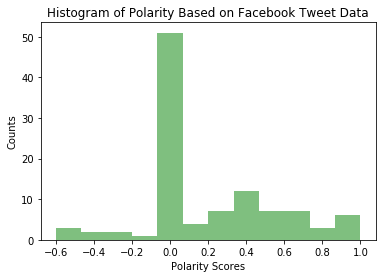

In [145]:
num_bins = 12
n, bins, patches = plt.hist(trumpFB.polarity, num_bins, facecolor = 'green', alpha = 0.5)
plt.xlabel('Polarity Scores')
plt.ylabel('Counts')
plt.title('Histogram of Polarity Based on Facebook Tweet Data')
plt.show()

Based on the histogram of polarity scores, one can see that most tweets involing Trump from Facebook are neutral. Next, we will run a few descriptive statistics on this data.

In [146]:
trumpFB['polarity'].value_counts()

 0.000000    49
 1.000000     6
 0.500000     4
 0.700000     3
 0.400000     3
 0.100000     2
 0.425000     2
 0.800000     2
 0.250000     2
-0.500000     2
-0.171875     1
 0.600000     1
 0.625000     1
 0.312500     1
-0.462500     1
 0.391667     1
-0.266667     1
 0.285714     1
 0.850000     1
 0.450000     1
 0.468182     1
 0.333333     1
 0.300000     1
 0.010417     1
 0.600000     1
 0.308333     1
 0.050000     1
 0.590625     1
 0.462500     1
 0.200000     1
 0.175000     1
-0.300000     1
 0.383333     1
-0.600000     1
 0.512121     1
 0.425000     1
-0.412500     1
 0.388750     1
 0.725000     1
 0.378788     1
Name: polarity, dtype: int64

In [147]:
# calculate the standard deviation

print("The Standard Deviation of Polarity for trumpFB is % s" % (round(np.std(trumpFB.polarity),2)))

# calculate the mean

print("The Mean of Polarity for trumpFB is % s" % (round(np.mean(trumpFB.polarity),2)))

The Standard Deviation of Polarity for trumpFB is 0.35
The Mean of Polarity for trumpFB is 0.2


Based off the value counts data, we can see that 49 of the 105 (43%) tweets were neutral while the mean was 0.2 with a standard deviation of 0.35; deeming that most of the Facebook tweets involving Trump were positive.

Next we will create a subjectivity function and then apply it to the entire dataframe, as well as the polarity function which was appened to trumpFB

In [148]:
def sa_subject(Tweet):
    return TextBlob(Tweet).sentiment.subjectivity

In [149]:
trumpTweets['Polarity'] = trumpTweets.Tweet.apply(sa_polarity)
trumpTweets['Subjectivity'] = trumpTweets.Tweet.apply(sa_subject)
trumpTweets.head()

,Date,Time,Tweet,Client,Client Simplified,Year,Month,Polarity,Subjectivity
0,2016-12-05,12:00:27 PM,If the press would cover me accurately & honor...,Twitter Web Client,Twitter Web Client,2016,12,-0.072917,0.675000
1,2016-12-05,9:53:11 AM,I am thrilled to nominate Dr. @RealBenCarson a...,Twitter for iPhone,Twitter for iPhone,2016,12,0.200000,0.233333
2,2016-12-04,6:30:22 PM,their country (the U.S. doesn't tax them) or t...,Twitter for Android,Twitter for Android,2016,12,-0.100000,0.375000
3,2016-12-04,6:23:55 PM,Did China ask us if it was OK to devalue their...,Twitter for Android,Twitter for Android,2016,12,0.002778,0.513889
4,2016-12-04,5:47:21 PM,".@FoxNews will be re-running ""Objectified: Don...",Twitter for Android,Twitter for Android,2016,12,0.650000,0.625000


Next, we will add a field entitled Sentiment which will inform the end user if the tweets were positive, negative, or neutral.

In [150]:
# convert the Polarity series to a list
Polarity = trumpTweets["Polarity"].tolist()

def assignSentiment():
    Sentiment = []
    for i in Polarity:
        if i > 0:
            Sentiment.append('Positive')
        elif i == 0:
            Sentiment.append('Neutral')
        else:
            Sentiment.append('Negative')
    return(Sentiment)

assignedSentiment = assignSentiment()    

In [151]:
# create the sentiment field
trumpTweets['Sentiment'] = assignedSentiment
trumpTweets.head()

,Date,Time,Tweet,Client,Client Simplified,Year,Month,Polarity,Subjectivity,Sentiment
0,2016-12-05,12:00:27 PM,If the press would cover me accurately & honor...,Twitter Web Client,Twitter Web Client,2016,12,-0.072917,0.675000,Negative
1,2016-12-05,9:53:11 AM,I am thrilled to nominate Dr. @RealBenCarson a...,Twitter for iPhone,Twitter for iPhone,2016,12,0.200000,0.233333,Positive
2,2016-12-04,6:30:22 PM,their country (the U.S. doesn't tax them) or t...,Twitter for Android,Twitter for Android,2016,12,-0.100000,0.375000,Negative
3,2016-12-04,6:23:55 PM,Did China ask us if it was OK to devalue their...,Twitter for Android,Twitter for Android,2016,12,0.002778,0.513889,Positive
4,2016-12-04,5:47:21 PM,".@FoxNews will be re-running ""Objectified: Don...",Twitter for Android,Twitter for Android,2016,12,0.650000,0.625000,Positive


In [152]:
# create an index field
trumpTweets['TrumpIndex'] = trumpTweets.index
trumpTweets.head()

,Date,Time,Tweet,Client,Client Simplified,Year,Month,Polarity,Subjectivity,Sentiment,TrumpIndex
0,2016-12-05,12:00:27 PM,If the press would cover me accurately & honor...,Twitter Web Client,Twitter Web Client,2016,12,-0.072917,0.675000,Negative,0
1,2016-12-05,9:53:11 AM,I am thrilled to nominate Dr. @RealBenCarson a...,Twitter for iPhone,Twitter for iPhone,2016,12,0.200000,0.233333,Positive,1
2,2016-12-04,6:30:22 PM,their country (the U.S. doesn't tax them) or t...,Twitter for Android,Twitter for Android,2016,12,-0.100000,0.375000,Negative,2
3,2016-12-04,6:23:55 PM,Did China ask us if it was OK to devalue their...,Twitter for Android,Twitter for Android,2016,12,0.002778,0.513889,Positive,3
4,2016-12-04,5:47:21 PM,".@FoxNews will be re-running ""Objectified: Don...",Twitter for Android,Twitter for Android,2016,12,0.650000,0.625000,Positive,4


#Graphing

Overall, the graph below shows us that the majority of tweets in reference to Donald Trump are positive while 29% are neutral and 16% were negative.

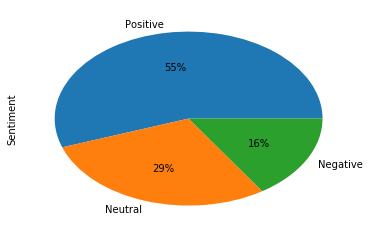

In [153]:
trumpTweets.Sentiment.value_counts().plot(kind = 'pie', autopct = '%1.0f%%')

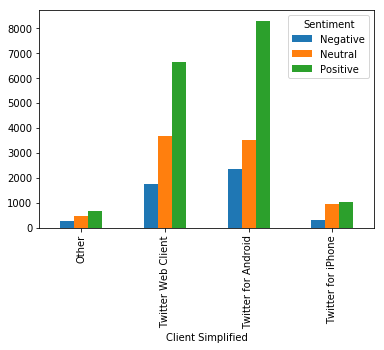

In [154]:
# Bar Chart based on Client Simplified 
Sentiment = trumpTweets.groupby(['Client Simplified','Sentiment']).Sentiment.count().unstack()
Sentiment.plot(kind = 'bar')

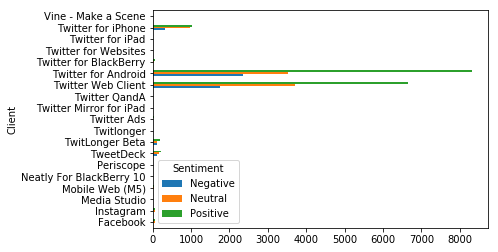

In [155]:
# Bar Chart based on Client 
Sentiment = trumpTweets.groupby(['Client','Sentiment']).Sentiment.count().unstack()
Sentiment.plot(kind = 'barh')

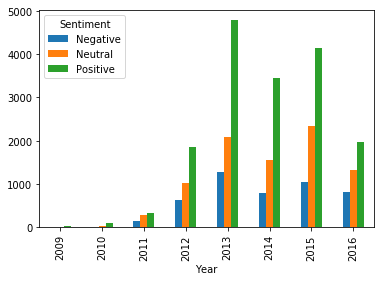

In [156]:
# Bar Chart based on Year 
Sentiment = trumpTweets.groupby(['Year','Sentiment']).Sentiment.count().unstack()
Sentiment.plot(kind = 'bar')

#Training/Test Data Sets

Next, using the sklearnmodel module we will create training and testing data sets in order to run TextBlob classifiers.

In [86]:
from sklearn.model_selection import train_test_split

In [122]:
# create the training and testing data sets using the 80-20 method
trumpTrain, trumpTest = train_test_split(trumpTweets, test_size=0.2)

In [123]:
# check the shape of the trumpTrain data set
print(trumpTrain.shape)

(24062, 11)


In [124]:
# check the shape of the trumpTest data set
print(trumpTest.shape)

(6016, 11)


#Final Data Set

In [157]:
trumpTweets

,Date,Time,Tweet,Client,Client Simplified,Year,Month,Polarity,Subjectivity,Sentiment,TrumpIndex
0,2016-12-05,12:00:27 PM,If the press would cover me accurately & honor...,Twitter Web Client,Twitter Web Client,2016,12,-0.072917,0.675000,Negative,0
1,2016-12-05,9:53:11 AM,I am thrilled to nominate Dr. @RealBenCarson a...,Twitter for iPhone,Twitter for iPhone,2016,12,0.200000,0.233333,Positive,1
2,2016-12-04,6:30:22 PM,their country (the U.S. doesn't tax them) or t...,Twitter for Android,Twitter for Android,2016,12,-0.100000,0.375000,Negative,2
3,2016-12-04,6:23:55 PM,Did China ask us if it was OK to devalue their...,Twitter for Android,Twitter for Android,2016,12,0.002778,0.513889,Positive,3
4,2016-12-04,5:47:21 PM,".@FoxNews will be re-running ""Objectified: Don...",Twitter for Android,Twitter for Android,2016,12,0.650000,0.625000,Positive,4
5,2016-12-04,2:58:43 PM,The Green Party just dropped its recount suit ...,Twitter for Android,Twitter for Android,2016,12,-0.250000,0.300000,Negative,5
6,2016-12-04,8:23:27 AM,expensive mistake! THE UNITED STATES IS OPEN F...,Twitter for Android,Twitter for Android,2016,12,-0.312500,0.600000,Negative,6
7,2016-12-04,8:21:01 AM,these companies are able to move between all 5...,Twitter for Android,Twitter for Android,2016,12,0.233333,0.308333,Positive,7
8,2016-12-04,8:05:35 AM,"wanting to sell their product, cars, A.C. unit...",Twitter for Android,Twitter for Android,2016,12,-0.250000,0.500000,Negative,8
9,2016-12-04,7:57:41 AM,"without retribution or consequence, is WRONG! ...",Twitter for Android,Twitter for Android,2016,12,-0.095833,0.816667,Negative,9


#Conclusion
Surprisngly, the tweets involving Donald Trump are not viewed as negative according to textblob and their sentiment analysis. In my findings I found it extremely interesting to see the disparity in Android vs iPhone. Although, this is the first testing I would like to explore other sentiment analysis with the same data to see if there are major differences.